# Actividad 2.1
En este ejercicio vamos a hacer scrapping sobre una página de juegos de mesa para dar un formato más práctico a la información.

En el ejercicio tendrás que programas parte de un código python. En concreto, las partes a programar tienen las siguientes características:
+ Vienen precedidas por el comentario: __########INSERTAR CODIGO AQUI__. Eso quiere decir que la parte a programar será en la línea o líneas inmediatamente inferiores
+ En concreto tendrás que rellenar aquellas partes en las que ponga la  palabra clave __None__ (elimina la palabra None y escribe tu código)
+ Es posible que tengas que contestar a preguntas con texto. Para ello se han habilitado celdas de texto vacías, que podrás rellenar

__Descripción__:
La página https://boardgamegeek.com/browse/boardgame contiene un ranking de juegos del 1 al 99, pero no nos gusta la forma en la que han organizado la información ya que mezclan en una misma columna del listado el nombre del juego, el año en que salió a la venta y su descripción (en inglés).

Nuestros objetivos van a ser:
1. Hacer scraping sobre la página para obtener como resultado un dataframe de pandas (una tabla) que tenga 3 columnas: Name, Year, Description. Este dataframe lo guardaremos en un fichero csv

2. Hacer un pequeño análisis de los juegos según el año

3. Hacer un listado de juegos que hablan sobre un tema concreto

4. (EXTRA) ¿Cómo lo haríamos si quisiéramos hacer el listado de los 1000 primeros juegos? 

#### 1 - Scraping de datos y almacenaje en dataframe

Antes de empezar sería bueno que revisaras en un navegador la página web en la que haremos el scraping (te aconsejo que uses Chrome). Comprueba con el inspector del navegador (botón derecho-Inspect), que realmente la información del nombre, fecha y descripción de cada juego están almacenados en lugares (tags) distintos del html. Una vez hecho esto, vamos a empezar con la práctica.

* Vamos a empezar importando las librerias de numpy, pandas, matplotlib, requests y BeautifulSoup

In [1]:
########INSERTAR CODIGO AQUI
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests as rq
from bs4 import BeautifulSoup

* A continuación definimos en una variable la url que vamos a acceder y usamos la librería requests para hacer una petición, que guardamos en la variable res. Luego revisamos que el estatus de respuesta de la petición es válido

In [2]:
#Almacenamos la url
########INSERTAR CODIGO AQUI
url = "https://boardgamegeek.com/browse/boardgame"

#Hacemos la petición (usa la variable url)
########INSERTAR CODIGO AQUI
res = rq.get(url)

#Vemos el resultado de la petición
########INSERTAR CODIGO AQUI
print(f'Mi petición a la url {url} ha dado como resultado: {res.status_code}')

Mi petición a la url https://boardgamegeek.com/browse/boardgame ha dado como resultado: 200


* Ahora vamos a usar BeautifulSoup para parsear el contenido de res. Usa el parser 'html'. Lo guardaremos en la variable soup

In [3]:
########INSERTAR CODIGO AQUI
soup = BeautifulSoup(res.text, "html.parser")
soup.find('table')

<table cellpadding="0" cellspacing="1" class="collection_table" id="collectionitems" width="100%">
<tr>
<th class="collection_bggrating">
<a href="/browse/boardgame?sort=rank&amp;sortdir=desc">Board Game Rank<img alt="ascending sort" border="0" hspace="5" src="https://cf.geekdo-static.com/images/collection/arrow_up.gif"/></a>
</th>
<th class="collection_thumbnail">
<span class="sr-only">Thumbnail image</span>
</th>
<th class="collection_title">
<a href="/browse/boardgame?sort=title">Title</a>
</th>
<th class="collection_bggrating">
<a href="/browse/boardgame?sort=bggrating">Geek Rating</a>
</th>
<th class="collection_bggrating">
<a href="/browse/boardgame?sort=avgrating">Avg Rating</a>
</th>
<th class="collection_bggrating">
<a href="/browse/boardgame?sort=numvoters">Num Voters</a>
</th>
<th class="collection_shop">
			Shop
		</th>
</tr>
<tr id="row_">
<td align="center" class="collection_rank">
<a name="1"></a>			1			
					</td>
<td class="collection_thumbnail">
<a href="/boardgame/17

* A continuación vamos a crear tres listas en python: lista de nombres de los juegos, lista de años de producción y lista de descripciones. Con estas listas luego generaremos el dataframe
1. __Lista de nombres__: mira que tags contienen los nombres y genera una primera lista (te será útil la función __find_all('nombre_tag', class_='nombre_clase_del_tag')__, luego genera una segunda lista vacía, recorre todos los tags de la primera lista y almacena en la segunda lista sólo la información del texto de los nombres

In [4]:
########INSERTAR CODIGO AQUI
tag_title = soup.find_all('a', class_='primary')
title = []
for tag in tag_title:
    ########INSERTAR CODIGO AQUI
    title.append(tag.text)
print(f'La lista de títulos de juegos es:\n{title}')

La lista de títulos de juegos es:
['Gloomhaven', 'Brass: Birmingham', 'Pandemic Legacy: Season 1', 'Ark Nova', 'Twilight Imperium: Fourth Edition', 'Terraforming Mars', 'Gloomhaven: Jaws of the Lion', 'Star Wars: Rebellion', 'War of the Ring: Second Edition', 'Spirit Island', 'Gaia Project', 'Through the Ages: A New Story of Civilization', 'Dune: Imperium', 'Great Western Trail', 'Twilight Struggle', 'Scythe', 'The Castles of Burgundy', 'Nemesis', '7 Wonders Duel', 'Brass: Lancashire', 'Concordia', 'A Feast for Odin', 'Terra Mystica', 'Wingspan', 'Clank!: Legacy – Acquisitions Incorporated', 'Eclipse: Second Dawn for the Galaxy', 'Arkham Horror: The Card Game', 'Root', 'Lost Ruins of Arnak', 'Orléans', 'Everdell', 'Viticulture Essential Edition', 'Mage Knight Board Game', 'Barrage', 'Food Chain Magnate', 'Marvel Champions: The Card Game', 'Puerto Rico', 'Too Many Bones', 'Caverna: The Cave Farmers', 'Blood Rage', 'Pax Pamir: Second Edition', 'The Crew: Mission Deep Sea', 'Agricola', 'U

2. __Lista de años__: repetiremos el mismo proceso que con los nombres, pero en este caso haremos unas operaciones extra. Si te fijas los años vienen en el formato (####). Nosotros sólo queremos un número. Así que quitaremos los paréntisis '(' y ')', y convertiremos cada valor de string a entero

__TIP 1__: Se puede eliminar carácteres de un string haciendo __mi_variable_texto.replace('caracter_a_eliminar', '')__

__TIP 2__: Se puede convertir en python una variable de un tipo a otro tipo (casting) de la siguiente forma __tipofinal(variable_en_tipo_inicial)__

In [5]:
########INSERTAR CODIGO AQUI
tag_year = soup.find_all('span', class_='smallerfont dull')
year = []
for tag in tag_year:
    year_text  = tag.text
    
    #Eliminamos '('
    year_text  = year_text.replace('(', '')
    
    #Eliminamos ')' y convertimos a string
    year_text  = year_text.replace(')', '')
    year_number = int(year_text)
    
    year.append(year_number)
    
print(f'La lista de años de juegos es:\n{year}')

La lista de años de juegos es:
[2017, 2018, 2015, 2021, 2017, 2016, 2020, 2016, 2011, 2017, 2017, 2015, 2020, 2016, 2005, 2016, 2011, 2018, 2015, 2007, 2013, 2016, 2012, 2019, 2019, 2020, 2016, 2018, 2020, 2014, 2018, 2015, 2011, 2019, 2015, 2019, 2002, 2017, 2013, 2015, 2019, 2021, 2007, 2018, 2017, 2017, 2016, 2019, 2020, 2019, 2012, 2004, 2021, 1876, 2017, 2017, 2020, 2014, 2008, 2018, 2015, 2016, 2021, 2015, 2019, 2012, 2017, 2011, 2016, 2007, 2020, 2006, 2016, 2017, 2015, 2014, 2014, 2016, 2021, 2018, 2012, 2015, 2010, 2012, 2010, 2019, 2018, 1995, 2012, 2020, 2005, 2019, 2008, 2015, 2009, 2015, 2010, 2013, 2019, 2005]


3. __Lista de descripciones__: repetiremos el mismo proceso que con los nombres y los años. En este caso quitaremos los carácteres de salto de línea y de tabulación '\n' y '\t'

In [6]:
########INSERTAR CODIGO AQUI
tag_description = soup.find_all('p', class_='smallefont dull')
description = []
for tag in tag_description:
    description_text = tag.text
    
    #Eliminamos los carácteres '\n' y '\t'
    description_text = description_text.replace('\n', '')
    description_text = description_text.replace('\t', '')
    
    description.append(description_text)

print(f'La lista de descripciones es:\n{description}')

La lista de descripciones es:
['Vanquish monsters with strategic cardplay. Fulfill your quest to leave your legacy!', 'Build networks, grow industries, and navigate the world of the Industrial Revolution.', 'Mutating diseases are spreading around the world - can your team save humanity?', 'Plan and build a modern, scientifically managed zoo to support conservation projects.', 'Build an intergalactic empire through trade, research, conquest and grand politics.', 'Compete with rival CEOs to make Mars habitable and build your corporate empire.', 'Vanquish monsters with strategic cardplay in a 25-scenario Gloomhaven campaign.', 'Strike from your hidden base as the Rebels—or find and destroy it as the Empire.', 'The Fellowship and the Free Peoples clash with Sauron over the fate of Middle-Earth.', 'Island Spirits join forces using elemental powers to defend their home from invaders.', 'Expand, research, upgrade, and settle the galaxy with one of 14 alien species.', 'Rewrite history as you b

* Finalmente vamos a crear un dataframe de pandas (variable df), a partir de las 3 listas anteriores, cuyas columnas tendrán como encabezados 'Title', 'Year', 'Description'. Lo guardamos en un csv

__TIP 1__: Recuerda que se puede crear un dataframe a partir de listas de datos de distintas formas. En el curso lo hemos visto definiendo un diccionario en python (cuyas entradas son el nombre de la columna y la lista de datos asociada)

__TIP 2__: Los diccionarios en python se definen como __{'nombre_1': variable1, 'nombre2': variable2, ...}__ 

In [7]:
########INSERTAR CODIGO AQUI
df = pd.DataFrame({'Title':title, 'Year':year, 'Description':description})
display(df)

,Title,Year,Description
0,Gloomhaven,2017,Vanquish monsters with strategic cardplay. Ful...
1,Brass: Birmingham,2018,"Build networks, grow industries, and navigate ..."
2,Pandemic Legacy: Season 1,2015,Mutating diseases are spreading around the wor...
3,Ark Nova,2021,"Plan and build a modern, scientifically manage..."
4,Twilight Imperium: Fourth Edition,2017,"Build an intergalactic empire through trade, r..."
...,...,...,...
95,Raiders of the North Sea,2015,Gather your Viking crew in order to plunder se...
96,Troyes,2010,Defend the city and rise to power by influenci...
97,Eldritch Horror,2013,An unknown Elder God approaches the world—and ...
98,The Lord of the Rings: Journeys in Middle-Earth,2019,"Heroes explore Middle-earth, working together ..."


In [8]:
########INSERTAR CODIGO AQUI
nombre_alumno_sin_espacios='Damaris_Daniela'
apellido_alumno_sin_espacios='Nunez_Perez'


df.to_csv('lista_juegos_'+nombre_alumno_sin_espacios+'_'+apellido_alumno_sin_espacios+'.csv')

#### 2 - Pequeño análisis de los juegos según el año

* Ahora que ya tenemos nuestro dataframe de pandas, vamos a analizar los datos en función de los años. Para empezar miramos la información de nuestro dataframe

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        100 non-null    object
 1   Year         100 non-null    int64 
 2   Description  100 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


--> En la siguiente celda (celda de texto) escribe brevemente qué información útil hemos conseguido al hacer .info(). ¿Cuántas muestras tenemos? ¿Cuántas columnas? ¿De qué tipo los datos en cada columna?

__A CONTINUACIÓN CELDA A RELLENAR POR EL ALUMNO__

Tenemos un total de 100 muestras, 3 columnas donde los tipos de columna son:
- tipo objeto la columna Title
- tipo entero (int64) la columna Year 
- tipo objeto la columna Description

* Puesto que la columna 'Year' es la única numérica, vamos a trabajarla un poco. Para empezar, vamos a ver de forma numérica cuántos años distintos hay, y cuántos juegos se han producido en esos años:

1. Accede a la columna 'Year', y usa la función __value_counts()__ de pandas para generar una tabla (otro dataframe) de años y juegos por año

2. Cuenta cuántos años distintos hay, que se corresponde con el número de filas de la tabla que hemos creado antes

__TIP__: para saber las dimensiones de un dataframe podemos usar __df.shape__, o bien __df.shape[0]__, __df.shape[1]__ para alguna dimensión en concreto

In [10]:
#Accedemos a la columna 'Year' y contamos valores
########INSERTAR CODIGO AQUI
juegos_por_año = df['Year'].value_counts()

display(juegos_por_año)

2015    12
2017    11
2019    11
2016    11
2018     8
2020     8
2012     6
2021     5
2011     4
2014     4
2005     3
2007     3
2013     3
2010     3
2008     2
2002     1
2004     1
1876     1
2006     1
1995     1
2009     1
Name: Year, dtype: int64

In [11]:
#Miramos en la variable anterior el número de años (número de filas)
########INSERTAR CODIGO AQUI
num_años_distintos = juegos_por_año.count()

print(f'Hay un total de {num_años_distintos} años distintos\n')

Hay un total de 21 años distintos



* Vamos a extraer un array de numpy con todos los años y luego almacenaremos en sendas variables el año del juego más antiguo y el año del juego más moderno

__TIP 1__: para convertir una columna de pandas a un array de numpy, podemos usar la función __.to_numpy()__

__TIP 2__: En numpy tenemos funciones rápidas para sacar el máximo o el mínimo valor de un array

In [12]:
#Extraemos un array con todos los años
########INSERTAR CODIGO AQUI
year_array = df['Year'].to_numpy()

#Guardamos el año máximo y el mínimo en dos variables
########INSERTAR CODIGO AQUI
min_year = year_array.min()
max_year = year_array.max()

print(f'Año del juego más antiguo: {min_year}')
print(f'Año del juego más actual: {max_year}')

Año del juego más antiguo: 1876
Año del juego más actual: 2021


* A continuación, vamos a mostrar todos los datos relativos al juego más antiguo. Lo haremos en 2 pasos:
1. Buscaremos en el array de numpy cuál es el índice (posición) correspondiente al juego más antiguo (puedes usar la función __argmin()__ de numpy)
2. En el dataframe de todos los datos, buscaremos por índice la fila correspondiente a ese juego (revisa cómo se acceden a filas concretas de un dataframe)

In [13]:
#Extracción del índice del juego más antiguo
########INSERTAR CODIGO AQUI
position_min_year = year_array.argmin()

#Extracción de los datos del juego más antiguo
########INSERTAR CODIGO AQUI
complete_row_min_year = df.loc[position_min_year]

print(f"El juego más antiguo es:\n{complete_row_min_year}")

El juego más antiguo es:
Title                                                  Crokinole
Year                                                        1876
Description    Flick discs and make trick shots in this tradi...
Name: 53, dtype: object


* Para finalizar nuestro análisis, vamos a visualizar el histograma de distribución de juegos por años
Para ello usaremos la visualización __hist__ de matplotlib sobre el array de años. Como parámetro adicional al histograma le daremos el rango de años que queremos visualizar en el parámetro bins: __hist(xxx, bins=rango_años)__

__TIP 1__: Ejemplo. Si tuviéramos datos entre 1900 y 1800, entonces rango_años = 100 

Text(0, 0.5, 'Número de juegos')

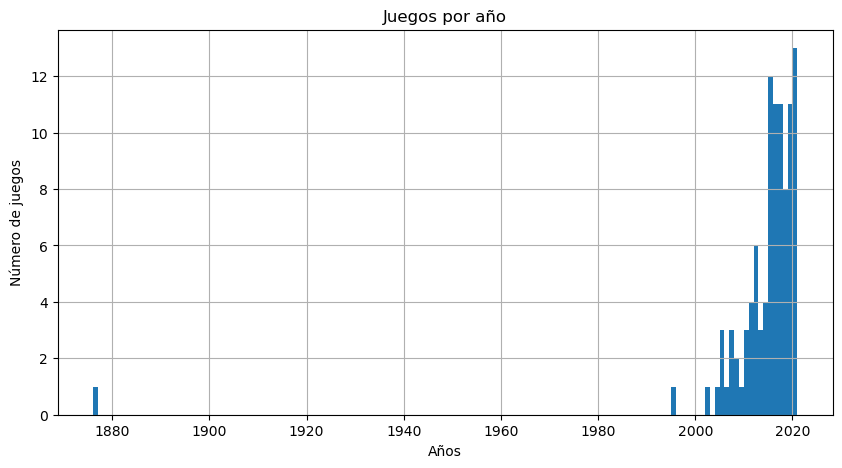

In [14]:
#Calculamos el rango de años de los datos (¿puedes usar variables que ya hemos creado?)
########INSERTAR CODIGO AQUI
years_range = max_year - min_year

#Mostramos la gráfica de barras del histograma con matplotlib
plt.figure(figsize=(10,5))
plt.grid()
########INSERTAR CODIGO AQUI
plt.hist(year_array, bins=years_range)

#Le añadimos un título, una etiqueta de eje X y una de eje Y a nuestra gráfica
########INSERTAR CODIGO AQUI
plt.title("Juegos por año")
plt.xlabel("Años")
plt.ylabel("Número de juegos")

__Pregunta__: ¿Crees que estamos visualizando bien la mayoría de los datos? ¿Crees que se podría eliminar algún outlier para luego visualizar los datos mejor? Responde brevemente en la siguiente celda.

__A CONTINUACIÓN CELDA A RELLENAR POR EL ALUMNO__

Creemos que no se estan observando de la mejor manera, ya que una ves obtenido el grafico podemos ver que existen una muestra muy alejada de las demás por lo que puede ser considerado ruido, por lo que es preferible eliminarlo, de esta manera podremos tener una visualización más limpia y amplia de los resultados ya que el rago del eje y se reduce.

* Vamos a repetir la visualización anterior, pero eliminando el dato que hayamos identificado como outlier, para que la visualización quede más clara. Para ello seguiremos 3 pasos

1. Eliminaremos del dataframe de datos la fila correspondiente al outlier. Para ello usaremos la función de pandas __.drop(indice_fila_a_eliminar, inplace = False)__. El resultado se almacenara en un dataframe nuevo
2. Convertimos la columna 'Year' del nuevo dataframe (sin el outlier) a numpy y calculamos sobre el array de años el nuevo rango de años
3. Mostramos la gráfica de histograma sobre el array creado y usando el parámetro bins=nuevo_rango_años

Text(0, 0.5, 'Número de juegos')

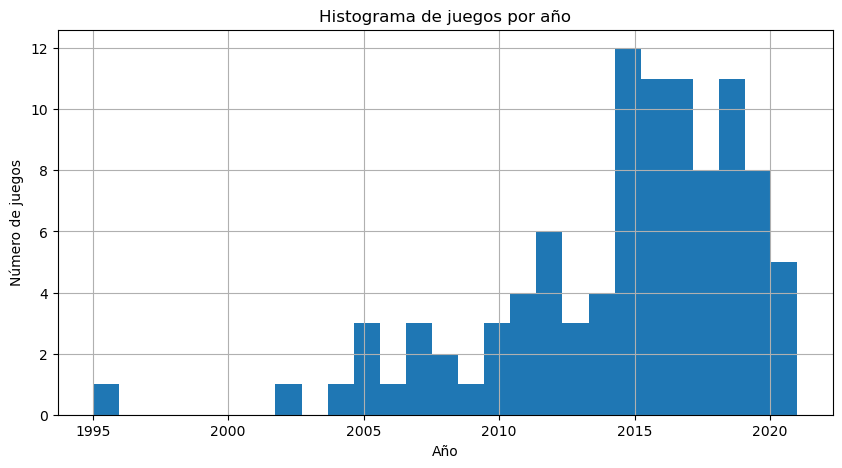

In [15]:
#Creamos un dataframe eliminando la fila del outlier
########INSERTAR CODIGO AQUI
df_without_outlier = df.drop(position_min_year, inplace = False)

#Calculamos el nuevo rango de años
year_array_without_outlier = df_without_outlier['Year'].to_numpy()
max_year_without_outlier = np.max(year_array_without_outlier)
min_year_without_outlier = np.min(year_array_without_outlier)

years_range_without_outlier = max_year_without_outlier - min_year_without_outlier + 1

#Mostramos el histograma sobre los datos sin outlier
plt.figure(figsize=(10,5))
plt.grid()
########INSERTAR CODIGO AQUI
plt.hist(year_array_without_outlier, bins=years_range_without_outlier)
plt.title('Histograma de juegos por año')
plt.xlabel('Año')
plt.ylabel('Número de juegos')

__Pregunta__: ¿Crees que ha mejorado la visualización? ¿Por qué? Responde brevemente en la siguiente celda.

__A CONTINUACIÓN CELDA A RELLENAR POR EL ALUMNO__

Sí, ha mejorado bastante, ya que podemos ver los datos con un rango en y más pequeño lo cual nos premite observar más intervalos en el eje anteriormente mencionado y de esta manera podemos analizar los datos de mejor manera. 

#### 3 - Extracción de información a partir de los datos
Vamos a concluir esta actividad con un rápido ejercicio de extracción de información. Supongamos que sólo estoy interesado en juegos que de forma directa tengan la __temática de aliens__. Seguiremos los siguientes pasos
1. Extraemos la columna que más información nos vaya a dar para nuestro objetivo
2. Definimos la palabra clave 'alien' y miramos qué filas contienen esa palabra
3. Mostramos en pantalla el resultado

__TIP 1__: Para buscar una palabra clave en una columna de tipo texto en pandas, podemos usar la función __columna.str.contains(palabra_clave)__. Esta será nuestra condición de filtrado del dataframe

__TIP 2__: Para filtrar un dataframe y quedarnos sólo con ciertas columnas podemos usar la siguiente expresión, df[condicion_de_filtrado] 

In [16]:
#Extraemos la columna interesante
########INSERTAR CODIGO AQUI
relevant_column = df['Description']

#Definimos la palabra clave y nuestra condición de filtrado
########INSERTAR CODIGO AQUI
keyword = 'alien'
condition = relevant_column.str.contains(keyword)

#Creamos un dataframe filtrado con la información relevante
########INSERTAR CODIGO AQUI
df_only_alien_games = df[condition]

print('Los juegos que hablan directamente de aliens son:\n')
display(df_only_alien_games)

Los juegos que hablan directamente de aliens son:



,Title,Year,Description
10,Gaia Project,2017,"Expand, research, upgrade, and settle the gala..."
17,Nemesis,2018,Survive an alien-infested spaceship but beware...
68,Aeon's End,2016,"Mages defend humanity’s last city, harnessing ..."


#### 4 (EXTRA) - Ampliar el número de juegos (datos)
Este apartado es opcional. No es imprescindible rellenarlo para acabar la actividad, pero se valorará positivamente si se rellena.

En este apartado no hay código, sólo una pregunta a responder: __¿Si hubiéramos querido nuestro dataset tuviera no 100 juegos, sino 1000, se te ocurre una forma rápida de hacerlo?__

Razona tu respuesta en la siguiente celda. Puedes escribir pseudocódigo, pero no hace falta que sea funcional

__TIP 1:__ si tenemos dos dataframes, los podemos concatenar con la función __pd.concat(lista_de_dataframes, ignore_index= True)__

__A CONTINUACIÓN CELDA A RELLENAR POR EL ALUMNO__

Podríamos haber indexado los datos de las demás páginas de la pagina web, ya que con la url unicamente tomo los 100 registros que escontraban en la página 1.

```
url = "https://boardgamegeek.com/browse/boardgame"
res = rq.get(url)
soup = BeautifulSoup(res.text, "html.parser")
soup.find('a', title_='last page')
soup.find('table')
## repetir el proceso realizado para crear el data friend
cont = 1
while(numero_registros < 1000){
    url = url +'/page/' + cont
    res = rq.get(url)
    soup = BeautifulSoup(res.text, "html.parser")
    ##generar los arrays de las columnas
    cont = cont + 1
}
##generar el nuevo data frame
##concatenar con el primer data frame
pd.concat(nuevo_dataframe, ignore_index= True)
```